## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"


In [1]:
import tensorflow as tf
from os import path, getcwd, chdir

# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/mnist.npz"

The training images:   (60000, 28, 28)
The test images:  (10000, 28, 28)


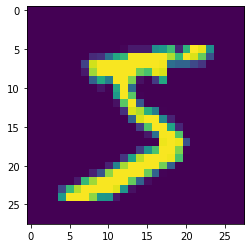

In [3]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
print("The training images:  ",training_images.shape)
print("The test images: ",test_images.shape)
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
plt.show()


In [15]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.998):
            print("\nReached 99.8% accuracy so cancelling training!")
            self.model.stop_training = True

# GRADED FUNCTION: train_mnist_conv
my_callbacks=myCallback()
def train_mnist_conv():
    
    # Please write your code only where you are indicated.
    # please do not remove model fitting inline comments.

    # YOUR CODE STARTS HERE
    
    # YOUR CODE ENDS HERE

    mnist = tf.keras.datasets.mnist
    (training_images, training_labels), (test_images, test_labels) = mnist.load_data(path=path)
     # YOUR CODE STARTS HERE
    training_images=training_images.reshape(training_images.shape[0],28,28,1)
    training_images=training_images/255.0
    test_images=test_images.reshape(test_images.shape[0],28,28,1)
    test_images=training_images/255.0
    # Dense layer with tanh activation performs  better than the one with relu activation
    
    '''
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation="tanh"),
        tf.keras.layers.Dense(10,activation="softmax")
    ])
    # YOUR CODE ENDS HERE
    '''
    # we can also use the following code instead which basically does the same
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64,activation="tanh"))
    model.add(tf.keras.layers.Dense(10,activation="softmax"))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model fitting
    history = model.fit(
        # YOUR CODE STARTS HERE
        training_images,training_labels,epochs=20,callbacks=[my_callbacks]
        # YOUR CODE ENDS HERE
        )
    # model fitting
    return history.epoch, history.history['acc'][-1]



In [16]:
_, _ = train_mnist_conv()

Epoch 1/20
60000/60000 [==============================] - 15s 242us/sample - loss: 0.1579 - acc: 0.9548
Epoch 2/20
60000/60000 [==============================] - 15s 242us/sample - loss: 0.0544 - acc: 0.9843
Epoch 3/20
60000/60000 [==============================] - 14s 232us/sample - loss: 0.0337 - acc: 0.9902
Epoch 4/20
60000/60000 [==============================] - 14s 227us/sample - loss: 0.0231 - acc: 0.9934
Epoch 5/20
60000/60000 [==============================] - 14s 232us/sample - loss: 0.0159 - acc: 0.9953
Epoch 6/20
60000/60000 [==============================] - 13s 225us/sample - loss: 0.0103 - acc: 0.9972
Epoch 7/20
59552/60000 [============================>.] - ETA: 0s - loss: 0.0075 - acc: 0.9981
Reached 99.8% accuracy so cancelling training!
60000/60000 [==============================] - 13s 222us/sample - loss: 0.0075 - acc: 0.9980


In [17]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);